In [20]:
import networkx as nx
import numpy as np

In [21]:
n_nodes = 50
n_clusters = 5
p_in = 0.2
p_out = 0.05

# Generate the graph using the Erdős–Rényi model
G = nx.erdos_renyi_graph(n_nodes, p_in)

# Add edges between nodes in the same cluster
for c in range(n_clusters):
    nodes = np.random.choice(n_nodes, size=n_nodes//n_clusters, replace=False)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                G.add_edge(u, v)

# Add edges between nodes in different clusters
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.random.uniform() < p_out:
            G.add_edge(u, v)

In [1]:
def leiden_algorithm(G):
    # Initialize the clustering
    partition = {u: i for i, u in enumerate(G.nodes())}

    while True:
        # Aggregation phase
        improved = False
        for u in G.nodes():
            neighbors = list(G.neighbors(u))
            if len(neighbors) == 0:
                continue
            scores = []
            for v in neighbors:
                if partition[v] == partition[u]:
                    score = 2*p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                else:
                    score = p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                scores.append(score)
            max_score = max(scores)
            if max_score > 0:
                v = neighbors[scores.index(max_score)]
                partition[u] = partition[v]
                improved = True

        # Refinement phase
        if not improved:
            break
        subgraphs = [G.subgraph([u for u in G.nodes() if partition[u] == i]) for i in set(partition.values())]
        for subgraph in subgraphs:
            if subgraph.number_of_edges() == 0:
                continue
            degrees = dict(subgraph.degree())
            B = sum(subgraph.degree([u]) for u in subgraph.nodes())/2
            D = sum(degrees.values())
            Q = sum(degrees[u]*degrees[v]/(2*B) for u, v in subgraph.edges())
            for u in subgraph.nodes():
                max_delta_Q = 0
                max_v = None
                for v in G.nodes():
                    if partition[v] == partition[u]:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 4*degrees[u]*degrees[v]/(2*B))/D
                    else:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 2*degrees[u]*degrees[v]/(2*B))/D

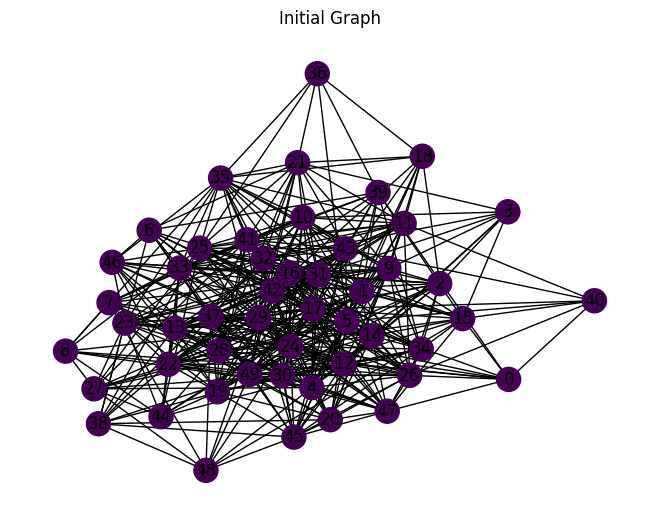

In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

n_nodes = 50
n_clusters = 5
p_in = 0.2
p_out = 0.05

# Generate the graph using the Erdős–Rényi model
G = nx.erdos_renyi_graph(n_nodes, p_in)

# Add edges between nodes in the same cluster
for c in range(n_clusters):
    nodes = np.random.choice(n_nodes, size=n_nodes//n_clusters, replace=False)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                G.add_edge(u, v)

# Add edges between nodes in different clusters
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.random.uniform() < p_out:
            G.add_edge(u, v)

pos = nx.spring_layout(G)
colors = [0 for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Initial Graph')
plt.show()

def leiden_algorithm(G):
    # Initialize the clustering
    partition = {u: i for i, u in enumerate(G.nodes())}

    while True:
        # Aggregation phase
        improved = False
        for u in G.nodes():
            neighbors = list(G.neighbors(u))
            if len(neighbors) == 0:
                continue
            scores = []
            for v in neighbors:
                if partition[v] == partition[u]:
                    score = 2*p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                else:
                    score = p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                scores.append(score)
            max_score = max(scores)
            if max_score > 0:
                v = neighbors[scores.index(max_score)]
                partition[u] = partition[v]
                improved = True

            colors = [partition[u] for u in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=True)
            plt.title('Aggregation phase')
            plt.show()

        # Refinement phase
        if not improved:
            break
        subgraphs = [G.subgraph([u for u in G.nodes() if partition[u] == i]) for i in set(partition.values())]
        for subgraph in subgraphs:
            if subgraph.number_of_edges() == 0:
                continue
            degrees = dict(subgraph.degree())
            B = sum(subgraph.degree([u]) for u in subgraph.nodes())/2
            D = sum(degrees.values())
            Q = sum(degrees[u]*degrees[v]/(2*B) for u, v in subgraph.edges())
            for u in subgraph.nodes():
                max_delta_Q = 0
                max_v = None
                for v in G.nodes():
                    if partition[v] == partition[u]:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 4*degrees[u]*degrees[v]/(2*B))/D
                    else:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 2*degrees[u]*degrees[v]/(2*B))/D
                    if delta_Q > max_delta_Q:
                        max_delta_Q = delta_Q
                        max_v = v
                if max_v is not None and max_delta_Q > 0:
                    partition[u] = partition[max_v]

            colors = [partition[u] for u in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=True)
        plt.title('Clustering Result')
        plt.show

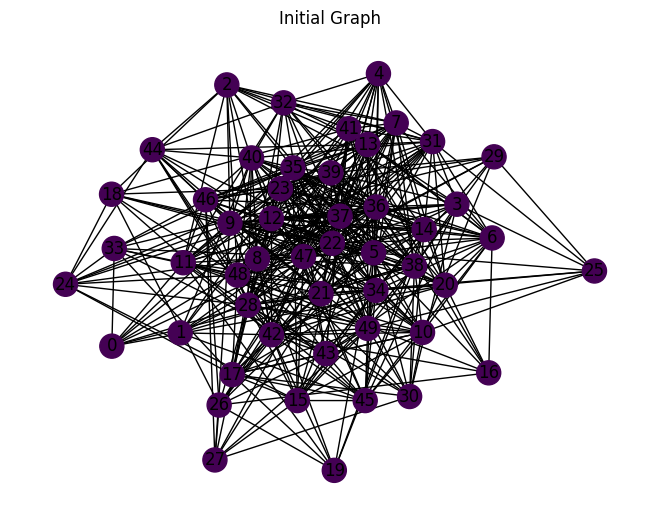

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

n_nodes = 50
n_clusters = 5
p_in = 0.2
p_out = 0.05

# Generate the graph using the Erdős–Rényi model
G = nx.erdos_renyi_graph(n_nodes, p_in)

# Add edges between nodes in the same cluster
for c in range(n_clusters):
    nodes = np.random.choice(n_nodes, size=n_nodes//n_clusters, replace=False)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                G.add_edge(u, v)

# Add edges between nodes in different clusters
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.random.uniform() < p_out:
            G.add_edge(u, v)

pos = nx.spring_layout(G)
colors = [0 for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Initial Graph')
plt.show()

def leiden_algorithm(G):
    # Initialize the clustering
    partition = {u: i for i, u in enumerate(G.nodes())}

    while True:
        # Aggregation phase
        improved = False
        for u in G.nodes():
            neighbors = list(G.neighbors(u))
            if len(neighbors) == 0:
                continue
            scores = []
            for v in neighbors:
                if partition[v] == partition[u]:
                    score = 2*p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                else:
                    score = p_in - sum(G.degree([u, v]).values())/(2*G.number_of_edges())
                scores.append(score)
            max_score = max(scores)
            if max_score > 0:
                v = neighbors[scores.index(max_score)]
                partition[u] = partition[v]
                improved = True

        # Refinement phase
        if not improved:
            break
        subgraphs = [G.subgraph([u for u in G.nodes() if partition[u] == i]) for i in set(partition.values())]
        for subgraph in subgraphs:
            if subgraph.number_of_edges() == 0:
                continue
            degrees = dict(subgraph.degree())
            B = sum(subgraph.degree([u]) for u in subgraph.nodes())/2
            D = sum(degrees.values())
            Q = sum(degrees[u]*degrees[v]/(2*B) for u, v in subgraph.edges())
            for u in subgraph.nodes():
                max_delta_Q = 0
                max_v = None
                for v in G.nodes():
                    if partition[v] == partition[u]:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 4*degrees[u]*degrees[v]/(2*B))/D
                    else:
                        delta_Q = (2*p_in*(degrees[u]+degrees[v]) - 2*degrees[u]*degrees[v]/(2*B))/D
                    if delta_Q > max_delta_Q:
                        max_delta_Q = delta_Q
                        max_v = v
                if max_v is not None and max_delta_Q > 0:
                    partition[u] = partition[max_v]

        colors = [partition[u] for u in G.nodes()]
        nx.draw(G, pos, node_color=colors, with_labels=True)
        plt.title('Clustering Result')
        plt.show()
        

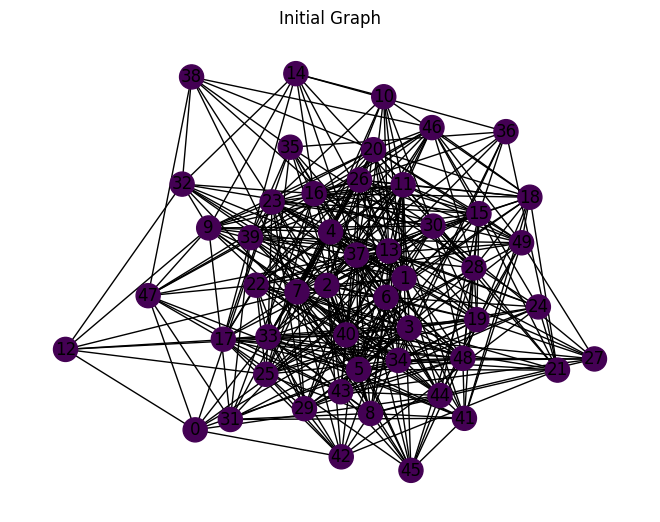

NameError: name 'aggregate_nodes' is not defined

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

n_nodes = 50
n_clusters = 5
p_in = 0.2
p_out = 0.05

# Generate the graph using the Erdős–Rényi model
G = nx.erdos_renyi_graph(n_nodes, p_in)

# Add edges between nodes in the same cluster
for c in range(n_clusters):
    nodes = np.random.choice(n_nodes, size=n_nodes//n_clusters, replace=False)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                G.add_edge(u, v)

# Add edges between nodes in different clusters
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.random.uniform() < p_out:
            G.add_edge(u, v)

pos = nx.spring_layout(G)
colors = [0 for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Initial Graph')
plt.show()

def leiden_algorithm(G, r=0.5):
    # Initialize each node to its own community
    partition = {u: i for i, u in enumerate(G.nodes())}
    
    # Initialize the resolution parameter
    gamma = 1/r
    
    # Compute the initial modularity
    modularity = compute_modularity(G, partition, gamma)
    
    # Keep track of the maximum modularity found so far
    max_modularity = modularity
    
    # Set the flag to indicate if the refinement phase is needed
    refinement_needed = True
    
    # Initialize the iteration count
    iter_count = 0
    
    # Keep running the algorithm until no more improvements can be made
    while refinement_needed:
        # Increment the iteration count
        iter_count += 1
        
        # Compute the maximum score for each node in the aggregation phase
        max_scores = compute_max_scores(G, partition, gamma)
        
        # Create a new partition by aggregating nodes with the same highest score
        new_partition = aggregate_nodes(G, partition, max_scores)
        
        # Compute the modularity of the new partition
        new_modularity = compute_modularity(G, new_partition, gamma)
        
        # Check if the modularity was improved in the aggregation phase
        if new_modularity > modularity:
            # If so, update the partition and modularity
            partition = new_partition
            modularity = new_modularity
            refinement_needed = True
            
            # Check if the new modularity is greater than the maximum modularity found so far
            if modularity > max_modularity:
                # If so, update the maximum modularity
                max_modularity = modularity
                
            # Plot the graph after the aggregation phase
            pos = nx.spring_layout(G)
            colors = [partition[u] for u in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=True)
            plt.title(f'Iteration {iter_count}: Aggregation phase')
            plt.show()
        else:
            refinement_needed = False
            
        # Refine the partition by moving nodes between communities
        if refinement_needed:
            partition = refine_partition(G, partition, gamma)
            
            # Compute the modularity of the refined partition
            modularity = compute_modularity(G, partition, gamma)
            
            # Plot the graph after the refinement phase
            pos = nx.spring_layout(G)
            colors = [partition[u] for u in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=True)
            plt.title(f'Iteration {iter_count}: Refinement phase')
            plt.show()
            
    return partition

#####
def compute_modularity(G, partition, gamma):
    m = G.number_of_edges()
    n = G.number_of_nodes()
    A = lil_matrix((n, n), dtype=np.int8)
    for u, v in G.edges():
        A[u, v] = 1
        A[v, u] = 1
    Q = 0
    for i, group_i in enumerate(partition):
        for j, group_j in enumerate(partition):
            if group_i == group_j:
                k_i = G.degree(i)
                k_j = G.degree(j)
                q_ij = A[i, j] - (k_i*k_j)/(2*m)
                Q += q_ij - (gamma/(2*m)) * k_i * k_j
    return Q/(2*m)

def compute_max_scores(G, partition, gamma):
    max_scores = {}
    for u in G.nodes():
        max_score = float("-inf")
        for v in G.neighbors(u):
            score = compute_score(G, u, v, partition, gamma)
            if score > max_score:
                max_score = score
                max_scores[u] = (v, max_score)
    return max_scores
def compute_score(G, u, v, partition, gamma):
    """Compute the score for merging node u and node v."""
    q_uv = G[u][v].get("weight", 1)
    m = G.number_of_edges()
    n = G.number_of_nodes()
    k_u_in = sum(q_uv for neighbor in G.neighbors(u) if partition[neighbor] == partition[u])
    k_v_in = sum(q_uv for neighbor in G.neighbors(v) if partition[neighbor] == partition[v])
    k_u_total = sum(G[u][neighbor].get("weight", 1) for neighbor in G.neighbors(u))
    k_v_total = sum(G[v][neighbor].get("weight", 1) for neighbor in G.neighbors(v))
    delta_q = (q_uv + gamma * k_u_in * k_v_total/m + gamma * k_v_in * k_u_total/m
               + gamma * k_u_in * k_v_in/m - gamma * k_u_total * k_v_total/m**2)
    return delta_q
# Run the Leiden algorithm
partition = leiden_algorithm(G)

# Plot the final clustering result
pos = nx.spring_layout(G)
colors = [partition[u] for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Final Clustering Result')
plt.show()

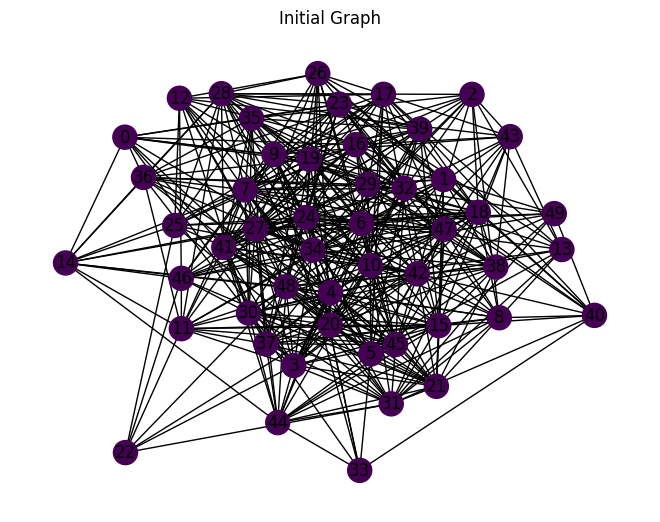

AttributeError: module 'networkx' has no attribute 'to_scipy_sparse_matrix'

In [3]:
import networkx as nx
import numpy as np
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt


n_nodes = 50
n_clusters = 5
p_in = 0.2
p_out = 0.05

# Generate the graph using the Erdős–Rényi model
G = nx.erdos_renyi_graph(n_nodes, p_in)

# Add edges between nodes in the same cluster
for c in range(n_clusters):
    nodes = np.random.choice(n_nodes, size=n_nodes//n_clusters, replace=False)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                G.add_edge(u, v)

# Add edges between nodes in different clusters
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.random.uniform() < p_out:
            G.add_edge(u, v)

pos = nx.spring_layout(G)
colors = [0 for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Initial Graph')
plt.show()

def compute_modularity(G, partition, gamma):
    m = G.number_of_edges()
    n = G.number_of_nodes()
    A = nx.to_scipy_sparse_matrix(G)
    Q = 0
    for i, group_i in enumerate(partition):
        for j, group_j in enumerate(partition):
            if i != j:
                edges = A[group_i, :][:, group_j]
                L = edges.sum()
                d_i = A[group_i, :].sum()
                d_j = A[group_j, :].sum()
                Q += (L - gamma*d_i*d_j/m)
    return Q/(2*m)

def compute_score(G, u, v, partition, gamma):
    m = G.number_of_edges()
    A = nx.to_scipy_sparse_matrix(G)
    k_i_in = A[u, :][:, partition == partition[u]].sum()
    k_i_tot = A[u, :].sum()
    k_j_in = A[v, :][:, partition == partition[v]].sum()
    k_j_tot = A[v, :].sum()
    delta_q = 2*gamma*(k_i_in*k_j_tot + k_j_in*k_i_tot - 2*k_i_in*k_j_in)/(m**2)
    return delta_q

def compute_max_scores(G, partition, gamma):
    max_scores = {}
    for u in G.nodes:
        max_score = float("-inf")
        for v in G.neighbors(u):
            score = compute_score(G, u, v, partition, gamma)
            if score > max_score:
                max_score = score
                max_scores[u] = (v, score)
    return max_scores

def aggregate_nodes(G, partition, max_scores):
    new_partition = partition.copy()
    for u, (v, score) in max_scores.items():
        if partition[u] != partition[v]:
            continue
        if score <= 0:
            continue
        new_partition[v] = new_partition[u] = u
    _, new_partition = np.unique(new_partition, return_inverse=True)
    return new_partition

def leiden_algorithm(G, r=0.1):
    # Initialize the partition with each node in its own community
    partition = np.arange(G.number_of_nodes())
    # Initialize the modularity and maximum modularity
    gamma = 1/r
    modularity = compute_modularity(G, partition, gamma)
    max_modularity = modularity
    # Initialize the iteration counter
    iter_count = 0
    # Iterate until convergence
    while True:
        # Compute the maximum score for each node in the aggregation phase
        max_scores = compute_max_scores(G, partition, gamma)
        # Create a new partition by aggregating nodes with the same highest score
        new_partition = aggregate_nodes(G, partition, max_scores)
        # Compute the modularity of the new partition
        new_modularity = compute_modularity(G, new_partition, gamma)
        # Check if the modularity has increased and update the partition
        if new_modularity - modularity > 1e-10:
            partition = new_partition
            modularity = new_modularity
            if modularity > max_modularity:
                max_modularity = modularity
        else:
            break
        iter_count += 1
    # Relabel the communities
    _, new_labels = connected_components(nx.to_scipy_sparse_matrix(G))


partition = leiden_algorithm(G)

# Plot the final clustering result
pos = nx.spring_layout(G)
colors = [partition[u] for u in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title('Final Clustering Result')
plt.show()

In [2]:
print("hi")

hi
